In [9]:
import numpy as np
import pandas as pd
import networkx as nx
import osmnx as ox
import math
import pandas as pd
import random
from matplotlib import pyplot as plt
import numpy as np
 
from funciones import read_data, calcular_distancia, calcular_matriz_dist, calcular_largo_ruta, graficar_ruta
from instancia import ubis, cap_tpte, info_locales
from instancia import G, color_nodos, color_arcos, ancho_edges

random.seed(42)
np.random.seed(42)

In [10]:
info_locales

,i,X,Y,I,U,L,r,h
0,0,444,237,1428,100000,0,-581,0.30
1,1,152,180,87,174,0,87,0.23
2,2,230,141,27,54,0,27,0.32
3,3,134,163,20,30,0,10,0.33
4,4,459,282,55,110,0,55,0.23
5,5,269,455,142,213,0,71,0.18
6,6,79,326,69,138,0,69,0.29
7,7,5,235,158,237,0,79,0.42
8,8,51,412,86,129,0,43,0.42
9,9,310,113,77,154,0,77,0.24


In [61]:
def reaccionar_inventario(G, tolerancia):
    """
    Función que verifica que locales deben ser visitados en base a su inventario. 
    En caso de que el inventario se encuentre bajo el umbral de tolerancia, se retorna True.
    """
    visitas = {nodo : False for nodo in G.nodes()}

    for nodo in G.nodes(data=True):
    
        if nodo[1]['Inv'] <= tolerancia * nodo[1]['Up']:
            visitas[nodo[0]] = True
    
    return visitas

reaccionar_inventario(G, 0.2)
        

{'N_0': True,
 'N_1': False,
 'N_2': False,
 'N_3': False,
 'N_4': False,
 'N_5': False,
 'N_6': False,
 'N_7': False,
 'N_8': False,
 'N_9': False,
 'N_10': False}

In [64]:
def IC_nrm(mu, sd, M=100, alfa = 0.95):
    """
    Función que calcula el intervalo de confianza para una distribución normal.
    """
    from scipy.stats import norm
    limite_inferior = mu + norm.ppf((1 - alfa) / 2) * sd / math.sqrt(M)
    limite_superior = mu - norm.ppf((1 - alfa) / 2) * sd / math.sqrt(M)
    
    return limite_inferior, limite_superior

In [65]:
IC_nrm(10, 2, alfa = 0.95)

(9.60800720309199, 10.39199279690801)

In [ ]:
def pronosticar_inventario(G, tolerancia, dist = 'n', mu = 0, sigma = 0.1):
    """
    Función que verifica que locales deben ser visitados en base a su inventario. 
    En caso de que el inventario se encuentre bajo el umbral de tolerancia, se retorna True.
    """
    visitas = {nodo : False for nodo in G.nodes()}

    for nodo in G.nodes(data=True):
        pronostico = 
        if nodo[1]['Inv'] - pronostico <= tolerancia * nodo[1]['Up']:
            visitas[nodo[0]] = True
    
    return visitas

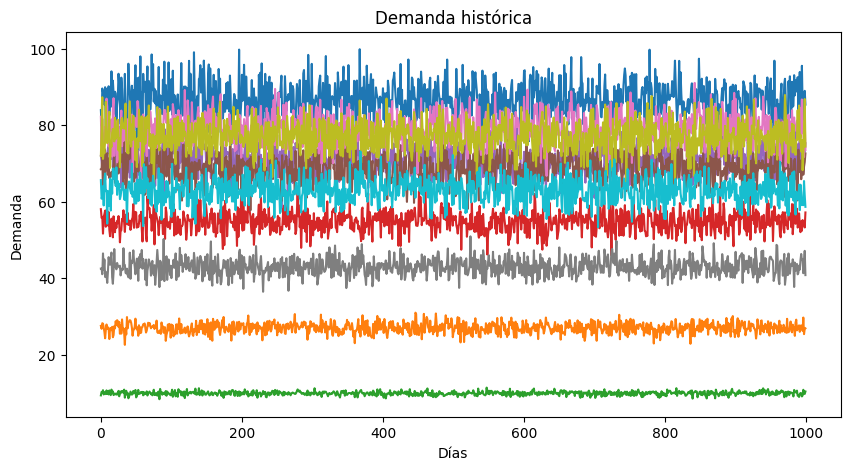

In [88]:
def simular_demanda_previa(G, dist = 'n',T =100):
    """
    Función que simula la demanda previa de los locales.
    """
    demandas = {nodo : [] for nodo in G.nodes()}
    if dist == 'n':
        for nodo in G.nodes(data=True):
            if nodo[0] != 'N_0':
                dem_pasadas = [np.random.normal(loc = nodo[1]['Prod'], scale = nodo[1]['Prod'] * 0.05) for i in range(T)]
                demandas[nodo[0]] = dem_pasadas
         
    return demandas
dem_historico = simular_demanda_previa(G, dist = 'n', T=1000)

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#graficar demanda historica
plt.figure(figsize=(10, 5))
for nodo in dem_historico.keys():
    if nodo != 'N_0':
        plt.plot(dem_historico[nodo])
        # plt.plot(smooth(dem_historico[nodo], 10))
plt.xlabel('Días')
plt.ylabel('Demanda')
plt.title('Demanda histórica')
plt.show()


In [56]:
dict = {'a': 1, 'b': 2, 'c': 3}
dict['a']

1

In [45]:
G.nodes(data=True)['N_0']

{'Inv': 1428,
 'Up': 100000,
 'Low': 0,
 'Prod': -581,
 'h': 0.3,
 'coord_x': 444,
 'coord_y': 237,
 'pos': (444, 237)}

In [17]:
for nodo in G.nodes():
    print(G[nodo])

{'N_1': {'weight': 297.5113443215233}, 'N_2': {'weight': 234.54637068179076}, 'N_3': {'weight': 318.709899438345}, 'N_4': {'weight': 47.43416490252569}, 'N_5': {'weight': 279.5514263959317}, 'N_6': {'weight': 375.69402444010205}, 'N_7': {'weight': 439.00455578501686}, 'N_8': {'weight': 430.20227800419656}, 'N_9': {'weight': 182.5705343148231}, 'N_10': {'weight': 135.14806694880988}}
{'N_0': {'weight': 297.5113443215233}, 'N_2': {'weight': 87.20665112249179}, 'N_3': {'weight': 24.758836806279895}, 'N_4': {'weight': 323.5011591942137}, 'N_5': {'weight': 298.8544796385023}, 'N_6': {'weight': 163.23296235748464}, 'N_7': {'weight': 156.95222202950808}, 'N_8': {'weight': 253.03161857759991}, 'N_9': {'weight': 171.618763542918}, 'N_10': {'weight': 181.64801127455263}}
{'N_0': {'weight': 234.54637068179076}, 'N_1': {'weight': 87.20665112249179}, 'N_3': {'weight': 98.48857801796105}, 'N_4': {'weight': 268.9274995235705}, 'N_5': {'weight': 316.4127051810657}, 'N_6': {'weight': 238.80117252643464

In [8]:
def simular_ejecucion(grafo = G, T=600, ALNS=True):
    # Inicializar variables     
    # ---------------------
    # Matriz de distancias
    matriz_dst = calcular_matriz_dist(grafo)
    # Lista de ubicaciones
    ubicaciones = list(grafo.nodes())
    
        